In [4]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'D:\Documents\ALL DATA\Data Analytics\Python\movies.csv')

In [5]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [6]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [7]:
print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [11]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0).astype(int)
df['gross'] = pd.to_numeric(df['gross'], errors='coerce').fillna(0).astype(int)

In [29]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime yearcorrect  
0   46998772        Warner Bros.    146.0        June  
1   58853106   Columbia Pictures    104.0        July  
2  538375067           Lucasfilm    124.0        June  
3   83453539  Paramount Pictures     88.0        July  
4   39846344      Orion Pictures     98.0        July

In [13]:
#correct year
df['yearcorrect'] = df['released'] .astype(str).str[:4]

In [30]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime yearcorrect  
0   46998772        Warner Bros.    146.0        June  
1   58853106   Columbia Pictures    104.0        July  
2  538375067           Lucasfilm    124.0        June  
3   83453539  Paramount Pictures     88.0        July  
4   39846344      Orion Pictures     98.0        July

In [18]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

name     rating      genre  \
6663         Star Wars: Episode VII - The Force Awakens      PG-13     Action   
7244                             Avengers: Infinity War      PG-13     Action   
7480                                      The Lion King         PG  Animation   
6653                                     Jurassic World      PG-13     Action   
6043                                       The Avengers      PG-13     Action   
6646                                          Furious 7      PG-13     Action   
7494                                          Frozen II         PG  Animation   
6644                            Avengers: Age of Ultron      PG-13     Action   
7247                                      Black Panther      PG-13     Action   
5845       Harry Potter and the Deathly Hallows: Part 2      PG-13  Adventure   
7075            Star Wars: Episode VIII - The Last Jedi      PG-13     Action   
7271                     Jurassic World: Fallen Kingdom      PG-13     Action   
6262                                             Frozen         PG  Animation   
7072                               Beauty and the Beast         PG     Family   
7281                                      Incredibles 2         PG  Animation   
7055                            The Fate of the Furious      PG-13     Action   
6244                                         Iron Man 3      PG-13     Action   
6688                                            Minions         PG  Animation   
6846                         Captain America: Civil War      PG-13     Action   
7250                                            Aquaman      PG-13     Action   
4245      The Lord of the Rings: The Return of the King      PG-13     Action   
7458                          Spider-Man: Far from Home      PG-13     Action   
7456                                     Captain Marvel      PG-13     Action   
5878                     Transformers: Dark of the Moon      PG-13     Action   
6059                                            Skyfall      PG-13     Action   
6494                    Transformers: Age of Extinction      PG-13     Action   
2448                                      The Lion King          G  Animation   
6047                              The Dark Knight Rises      PG-13     Action   
7463      Star Wars: Episode IX - The Rise of Skywalker      PG-13     Action   
7450                                              Joker          R      Crime   
7488                                        Toy Story 4          G  Animation   
5685                                        Toy Story 3          G  Animation   
4852         Pirates of the Caribbean: Dead Man's Chest      PG-13     Action   
6869                       Rogue One: A Star Wars Story      PG-13     Action   
7481                                            Aladdin         PG  Adventure   
5860        Pirates of the Caribbean: on Stranger Tides      PG-13     Action   
7140                                    Despicable Me 3         PG  Animation   
2245                                      Jurassic Park      PG-13     Action   
6908                                       Finding Dory         PG  Animation   
3451          Star Wars: Episode I - The Phantom Menace         PG     Action   
5667                                Alice in Wonderland         PG  Adventure   
6863                                           Zootopia         PG  Animation   
6045                  The Hobbit: An Unexpected Journey      PG-13  Adventure   
3843              Harry Potter and the Sorcerer's Stone         PG  Adventure   
5243                                    The Dark Knight      PG-13     Action   
5652       Harry Potter and the Deathly Hallows: Part 1      PG-13  Adventure   
6311                                    Despicable Me 2         PG  Animation   
6905                                    The Jungle Book         PG  Adventure   
7051                     Jumanji: Welcome to the Jungle      PG-13     Action   
6

In [17]:
pd.set_option('display.max_rows', None)

In [31]:
#Drop dup
df.drop_duplicates()
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime yearcorrect  
0   46998772        Warner Bros.    146.0        June  
1   58853106   Columbia Pictures    104.0        July  
2  538375067           Lucasfilm    124.0        June  
3   83453539  Paramount Pictures     88.0        July  
4   39846344      Orion Pictures     98.0        July

<Axes: xlabel='gross', ylabel='budget'>

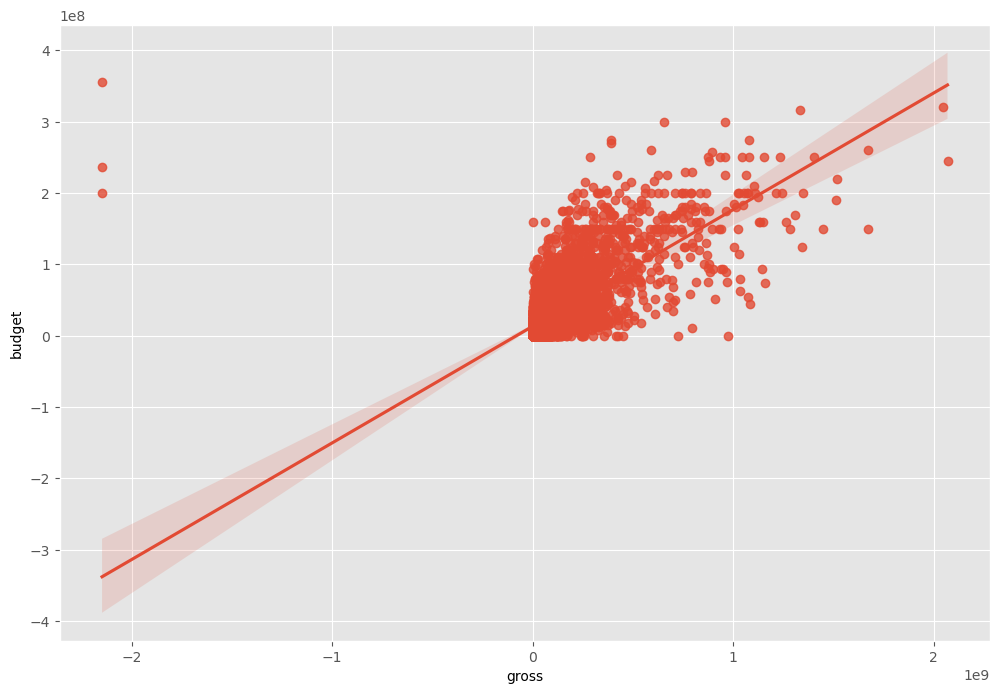

In [21]:
# Budget high correlation to revenue
sns.regplot(x="gross", y="budget", data=df)

<Axes: xlabel='score', ylabel='gross'>

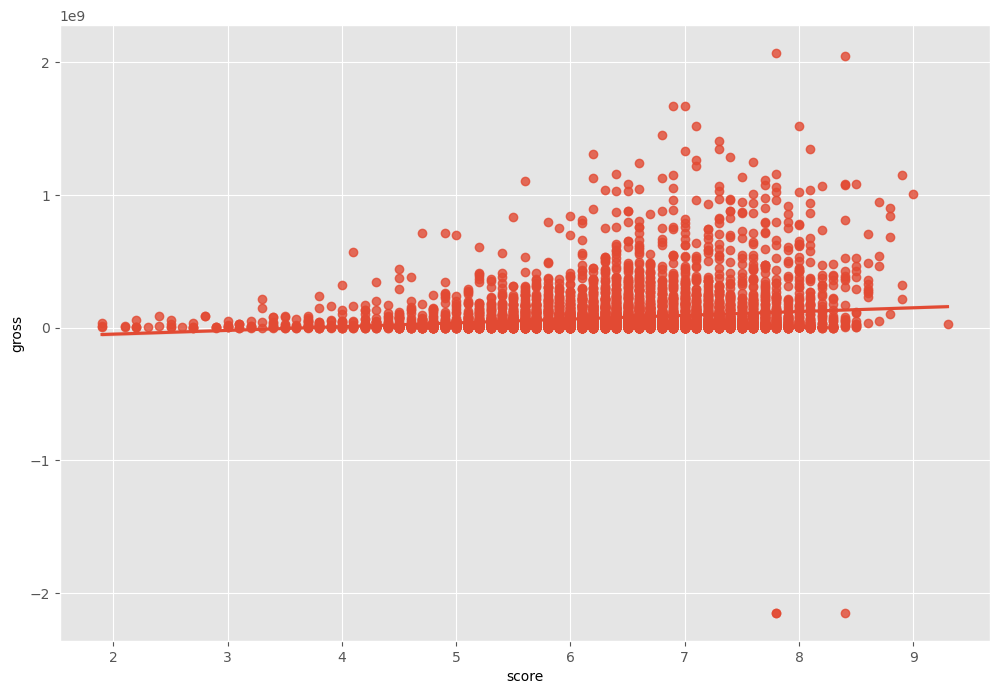

In [22]:
sns.regplot(x="score", y="gross", data=df)

In [24]:
df.corr(method ='pearson')

C:\Users\Walt.Viera\AppData\Local\Temp\ipykernel_15200\2355739806.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method ='pearson')


year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222945  0.309212  0.256331  0.120811
score    0.097995  1.000000  0.409182  0.055665  0.169406  0.399451
votes    0.222945  0.409182  1.000000  0.486862  0.573889  0.309212
budget   0.309212  0.055665  0.486862  1.000000  0.687124  0.269510
gross    0.256331  0.169406  0.573889  0.687124  1.000000  0.204177
runtime  0.120811  0.399451  0.309212  0.269510  0.204177  1.000000

C:\Users\Walt.Viera\AppData\Local\Temp\ipykernel_15200\1279345923.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


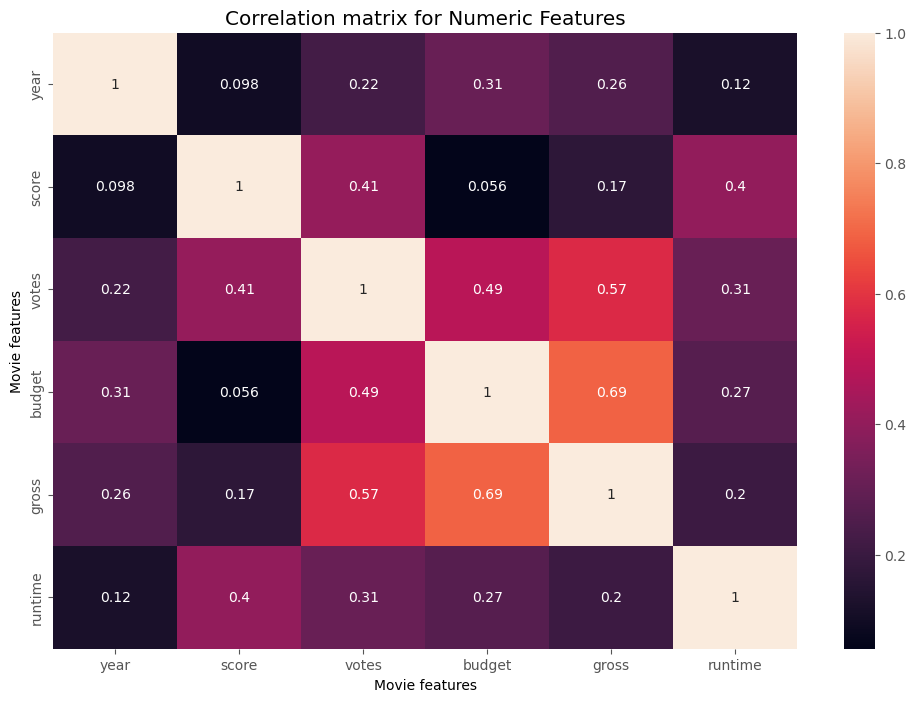

In [25]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [26]:

# Using factorize - this assigns a random numeric value for each unique categorical value

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

name    rating     genre      year  released     score  \
name         1.000000  0.143938  0.036367  0.965761  0.959015 -0.046733   
rating       0.143938  1.000000 -0.086723  0.156713  0.146606  0.012595   
genre        0.036367 -0.086723  1.000000  0.037184  0.035940 -0.002437   
year         0.965761  0.156713  0.037184  1.000000  0.993190 -0.044981   
released     0.959015  0.146606  0.035940  0.993190  1.000000 -0.045761   
score       -0.046733  0.012595 -0.002437 -0.044981 -0.045761  1.000000   
votes        0.287776  0.099972  0.023285  0.312401  0.299905 -0.009749   
director     0.745905  0.085520  0.047288  0.770497  0.770876 -0.022687   
writer       0.805211  0.103623  0.033688  0.824770  0.819617 -0.034685   
star         0.731565  0.093116  0.038649  0.756400  0.754468 -0.009896   
country      0.142828  0.000494 -0.015795  0.140216  0.148468  0.023097   
budget       0.275691  0.193229  0.069445  0.298022  0.284017 -0.011749   
gross        0.947192  0.158007  0.038781  0.980741  0.976912 -0.046835   
company      0.591667 -0.028035  0.009566  0.601571  0.607954 -0.028432   
runtime      0.048955  0.032741  0.001462  0.050647  0.048235  0.026436   
yearcorrect  0.005512 -0.023210 -0.006096  0.002813 -0.002119  0.027790   

                votes  director    writer      star   country    budget  \
name         0.287776  0.745905  0.805211  0.731565  0.142828  0.275691   
rating       0.099972  0.085520  0.103623  0.093116  0.000494  0.193229   
genre        0.023285  0.047288  0.033688  0.038649 -0.015795  0.069445   
year         0.312401  0.770497  0.824770  0.756400  0.140216  0.298022   
released     0.299905  0.770876  0.819617  0.754468  0.148468  0.284017   
score       -0.009749 -0.022687 -0.034685 -0.009896  0.023097 -0.011749   
votes        1.000000  0.192220  0.224122  0.179601 -0.045914  0.395374   
director     0.192220  1.000000  0.748340  0.682385  0.155471  0.108033   
writer       0.224122  0.748340  1.000000  0.675685  0.157202  0.186680   
star         0.179601  0.682385  0.675685  1.000000  0.182045  0.110870   
country     -0.045914  0.155471  0.157202  0.182045  1.000000 -0.068884   
budget       0.395374  0.108033  0.186680  0.110870 -0.068884  1.000000   
gross        0.285529  0.751155  0.805812  0.735987  0.134280  0.281209   
company      0.008900  0.552258  0.546151  0.527116  0.226346 -0.087285   
runtime      0.106024 -0.011070  0.032264  0.035392  0.124154  0.115359   
yearcorrect -0.050240  0.007811  0.016584  0.019895  0.018554 -0.086298   

                gross   company   runtime  yearcorrect  
name         0.947192  0.591667  0.048955     0.005512  
rating       0.158007 -0.028035  0.032741    -0.023210  
genre        0.038781  0.009566  0.001462    -0.006096  
year         0.980741  0.601571  0.050647     0.002813  
released     0.976912  0.607954  0.048235    -0.002119  
score       -0.046835 -0.028432  0.026436     0.027790  
votes        0.285529  0.008900  0.106024    -0.050240  
director     0.751155  0.552258 -0.011070     0.007811  
writer       0.805812  0.546151  0.032264     0.016584  
star         0.735987  0.527116  0.035392     0.019895  
country      0.134280  0.226346  0.124154     0.018554  
budget       0.281209 -0.087285  0.115359    -0.086298  
gross        1.000000  0.588216  0.041957    -0.001549  
company      0.588216  1.000000  0.005137     0.058092  
runtime      0.041957  0.005137  1.000000    -0.036201  
yearcorrect -0.001549  0.058092 -0.036201     1.000000

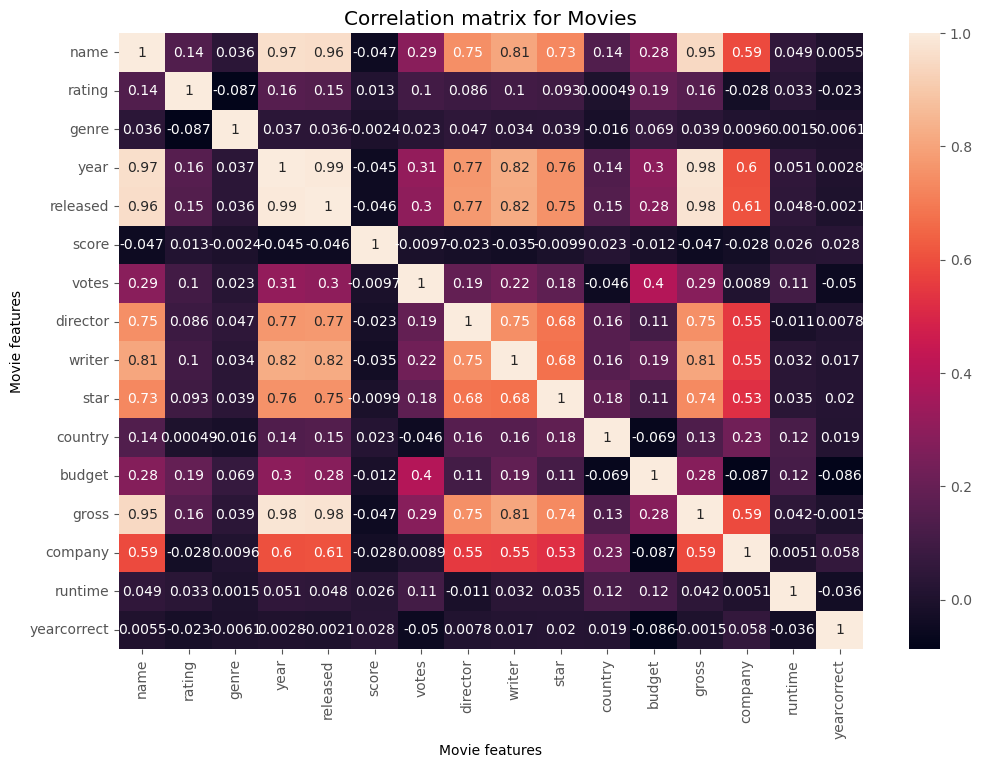

In [27]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [28]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

name         name           1.000000
             rating         0.143938
             genre          0.036367
             year           0.965761
             released       0.959015
             score         -0.046733
             votes          0.287776
             director       0.745905
             writer         0.805211
             star           0.731565
             country        0.142828
             budget         0.275691
             gross          0.947192
             company        0.591667
             runtime        0.048955
             yearcorrect    0.005512
rating       name           0.143938
             rating         1.000000
             genre         -0.086723
             year           0.156713
             released       0.146606
             score          0.012595
             votes          0.099972
             director       0.085520
             writer         0.103623
             star           0.093116
             country        0.000494
 